In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import winsound

In [2]:
face_cascade=cv2.CascadeClassifier('Computer-Vision-with-Python/DATA/haarcascades/haarcascade_frontalface_default.xml')

In [3]:
def detect_face(img):
    center_x=0
    center_y=0
    face_img=img.copy()
    face_rects=face_cascade.detectMultiScale(face_img)
    
    for(x,y,w,h) in face_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,255,255),10)
    
    for (x, y, w, h) in face_rects:
        center_x = x + w // 2
        center_y = y + h // 2
    return face_img,center_x,center_y

In [4]:

cap=cv2.VideoCapture(0)
line_start = (250, 100)
line_end = (250, 400)

while True:
    ret,frame=cap.read(0)
    
    frame,center_x,center_y=detect_face(frame)
    cv2.line(frame, line_start, line_end, (0, 0, 255), 2)
    
    if line_start[0] <= center_x <= line_end[0] and line_start[1] <= center_y <= line_end[1]:
        crossing=True
        winsound.Beep(700,400)
        print(crossing)
         # Object has crossed the line, draw a circle around it   
        cv2.circle(frame, (center_x, center_y), 50, (0, 255, 0), -1)
    cv2.imshow('frame',frame)
    k=cv2.waitKey(1)
    if k==27:
        break
        
cap.release()
cv2.destroyAllWindows()

AttributeError: 'NoneType' object has no attribute 'copy'

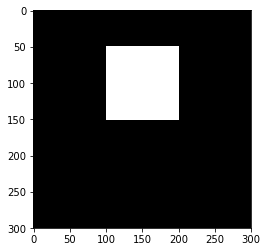

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Define the boundary shape (a rectangle in this case)
shape = (100, 50, 100, 100)  # (x, y, width, height)

# Create a blank image
image = np.zeros((300, 300, 3), np.uint8)

# Draw the rectangle on the image
cv2.rectangle(image, (shape[0], shape[1]), (shape[0]+shape[2], shape[1]+shape[3]), (255, 255, 255), -1)

plt.imshow(image)

In [4]:
import numpy as np

class KalmanFilter:
    def __init__(self, initial_state, initial_covariance, transition_matrix, process_noise_covariance, measurement_matrix, measurement_noise_covariance):
        self.state = initial_state
        self.covariance = initial_covariance
        self.transition_matrix = transition_matrix
        self.process_noise_covariance = process_noise_covariance
        self.measurement_matrix = measurement_matrix
        self.measurement_noise_covariance = measurement_noise_covariance

    def predict(self):
        self.state = np.dot(self.transition_matrix, self.state)
        self.covariance = np.dot(self.transition_matrix, np.dot(self.covariance, self.transition_matrix.T)) + self.process_noise_covariance

    def update(self, measurement):
        innovation = measurement - np.dot(self.measurement_matrix, self.state)
        innovation_covariance = np.dot(self.measurement_matrix, np.dot(self.covariance, self.measurement_matrix.T)) + self.measurement_noise_covariance
        kalman_gain = np.dot(self.covariance, np.dot(self.measurement_matrix.T, np.linalg.inv(innovation_covariance)))
        self.state = self.state + np.dot(kalman_gain, innovation)
        self.covariance = self.covariance - np.dot(kalman_gain, np.dot(self.measurement_matrix, self.covariance))

# Example usage
kf = KalmanFilter(initial_state=[0, 0], initial_covariance=np.eye(2), transition_matrix=np.eye(2), process_noise_covariance=np.eye(2) * 0.1, measurement_matrix=np.eye(2), measurement_noise_covariance=np.eye(2) * 0.5)

measurements = [[1, 0], [2, 0], [3, 0], [4, 0], [5, 0]]

for measurement in measurements:
    kf.predict()
    kf.update(measurement)
    print(f"Predicted state: {kf.state}")
    print(f"Predicted covariance: {kf.covariance}")


Predicted state: [0.6875 0.    ]
Predicted covariance: [[0.34375 0.     ]
 [0.      0.34375]]
Predicted state: [1.30463576 0.        ]
Predicted covariance: [[0.23509934 0.        ]
 [0.         0.23509934]]
Predicted state: [1.98493259 0.        ]
Predicted covariance: [[0.20063442 0.        ]
 [0.         0.20063442]]
Predicted state: [2.74158082 0.        ]
Predicted covariance: [[0.18774762 0.        ]
 [0.         0.18774762]]
Predicted state: [3.5665338 0.       ]
Predicted covariance: [[0.18263947 0.        ]
 [0.         0.18263947]]


In [3]:
import cv2
import numpy as np
import winsound
import time

line_start = (25, 250)
line_end = (400, 250)

center_x=0
center_y=0
red=False 

# video1 = cv2.VideoCapture("traffic_light_cop.mp4")
video1 = cv2.VideoCapture("test_video2.mp4")
video2=cv2.VideoCapture("ramp.mp4")
video3=cv2.VideoCapture("parking.mp4")
video4=cv2.VideoCapture("uturn.mp4")
video5=cv2.VideoCapture("traffic_light_cop.mp4")

ret1, eight = video1.read()
ret2,ramp=video2.read()
ret3,parking=video3.read()
ret4,u_turn=video4.read()
ret5,t_light=video5.read()

eight=cv2.resize(eight,(368,640))
ramp=cv2.resize(ramp,(368,640))
parking=cv2.resize(parking,(500,250))
u_turn=cv2.resize(u_turn,(400,640))
t_light=cv2.resize(t_light,(368,640))

# np.rot90(frame, k=1, axes=(0, 1))


# Select the region of interest (ROI) for tracking
roi = cv2.selectROI(eight)
print(roi)
track_img=eight.copy()
# roi=(185, 506, 40, 73)
roi1=(143, 457, 100, 160)

# Create a mask for the ROI
mask1 = np.zeros_like(eight)
mask1[roi[1]:roi[1]+roi[3], roi[0]:roi[0]+roi[2]] = 255
track_img[roi1[1]:roi1[1]+roi1[3], roi1[0]:roi1[0]+roi1[2]]=0

#cv2.imshow("track image",track_img)


# Set up the CAMShift tracker
tracker = cv2.TrackerCSRT_create()
tracker.init(eight, roi)   #initializing the tracker with the bounding box coordinates



def ramp_track():
    while True:
            
        ret2,ramp=video2.read()

        if not ret2:
            break
        ramp=cv2.resize(ramp,(368,640))
        time.sleep(1/20)
        cv2.imshow("ramp", ramp)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    video2.release()
    cv2.destroyAllWindows()
    
def parking_track():
    while True:
        ret3,parking=video3.read()
        
        if not ret3:
            break
        parking=cv2.resize(parking,(500,250))
        time.sleep(1/20)
        park_cpy=parking.copy()
        
        blur = cv2.GaussianBlur(park_cpy, (5, 5), 0)
        #rec,thresh1=cv2.threshold(frame,127,255,cv2.THRESH_BINARY_INV)
        imgHSV=cv2.cvtColor(blur,cv2.COLOR_BGR2HSV)
        lower=np.array([4,22,16])
        upper=np.array([100,249,255])
        mask=cv2.inRange(imgHSV,lower,upper)
        cv2.imshow("Mask",mask)

        blur1 = cv2.GaussianBlur(parking, (5, 5), 0)
        carHSV=cv2.cvtColor(blur1,cv2.COLOR_BGR2HSV)
        car_lower=np.array([0,55,153])
        car_upper=np.array([24,255,255])
        car_mask=cv2.inRange(carHSV,car_lower,car_upper)
        cv2.imshow("car mask",car_mask)
        
        result_img=cv2.bitwise_and(parking,parking,mask=mask)
        cv2.imshow("result",result_img)
        
        intersection = cv2.bitwise_and(mask,car_mask)
        
        num_white_pixels = cv2.countNonZero(intersection)
        cv2.imshow("Parking Img",parking)
        if num_white_pixels>50:
            print(num_white_pixels)
            winsound.Beep(700,400)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
            
    video3.release()
    cv2.destroyAllWindows()
            

        
def u_turn_track():
    while True:
        ret4,u_turn=video4.read()
        
        if not ret4:
            break
        
        u_turn=cv2.resize(u_turn,(400,640))
        time.sleep(1/20)
        
        blur = cv2.GaussianBlur(u_turn, (5, 5), 0)
        #rec,thresh1=cv2.threshold(frame,127,255,cv2.THRESH_BINARY_INV)
        imgHSV=cv2.cvtColor(blur,cv2.COLOR_BGR2HSV)
        lower=np.array([4,52,16])
        upper=np.array([100,249,255])
        mask=cv2.inRange(imgHSV,lower,upper)

        blur1 = cv2.GaussianBlur(u_turn, (5, 5), 0)
        carHSV=cv2.cvtColor(blur1,cv2.COLOR_BGR2HSV)
        car_lower=np.array([0,55,153])
        car_upper=np.array([24,255,255])
        car_mask=cv2.inRange(carHSV,car_lower,car_upper)
        
        cv2.imshow("Mask",mask)
        cv2.imshow("car mask",car_mask)
        cv2.imshow("U Turn Track",u_turn)
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
            
    video4.release()
    cv2.destroyAllWindows()
        
      
   
    
def traffic_light():
    while True:
        ret5,t_light=video5.read()
        
        if not ret5:
            break
            
        t_light=cv2.resize(t_light,(368,640))
        time.sleep(1/4)
        cv2.line(t_light, line_start, line_end, (0, 0, 255), 2)
        
        #cropped traffic light
        img2=t_light[21:31,254:258]
        img2=cv2.resize(img2,(320,184))
        cv2.imshow("cropped",img2)
        
        imgHSV=cv2.cvtColor(t_light,cv2.COLOR_BGR2HSV)
        lower=np.array([0,179,171])
        upper=np.array([255,255,255])
        mask=cv2.inRange(imgHSV,lower,upper)
        mask=cv2.resize(mask,(368,640))
        cv2.imshow("mask",mask)
        result_img=cv2.bitwise_and(t_light,t_light,mask=mask)
        cv2.imshow("result image",result_img)
        
        circle_at_center=np.zeros_like(t_light)
        
        success, roi = tracker.update(t_light)
        
        if success:
            x, y, w, h = [int(i) for i in roi]
        
            center_x = x + w // 2
            center_y = y + h // 2
            cv2.rectangle(t_light, (x, y), (x+w, y+h), (255, 0, 0), 2)
            cv2.circle(circle_at_center, (center_x, center_y),20, (255, 255, 255), -1)
            circle_at_center=cv2.cvtColor(circle_at_center,cv2.COLOR_BGR2GRAY)  #to remove the color channels
            cv2.imshow("circle at center",circle_at_center)
            
#             if line_start[0] <= center_x <= line_end[0] and line_start[1] <= center_y <= line_end[1]:
#                 crossing=True
#                 winsound.Beep(700,400)
#                 print(crossing)
#                  # Object has crossed the line, draw a circle around it   
#                 cv2.circle(eight, (center_x, center_y), 50, (0, 255, 0), -1)

            R =img2[125,150,2] #BGR format
            if R>=200:
                intersection = cv2.bitwise_and(mask,circle_at_center)
                num_white_pixels = cv2.countNonZero(intersection)
                if num_white_pixels>10:
                    print(num_white_pixels)
                    winsound.Beep(700,400)
            
#                 winsound.Beep(700,400)
        #         winsound.PlaySound('alert.WAV', winsound.SND_ASYNC)
                    red=True
                    print("Fail")
        cv2.imshow("traffic light",t_light)
        k=cv2.waitKey(1) &0xFF
        if k==27:
            break

        
        
    video5.release()
    cv2.destroyAllWindows()

while True:
   
    ret1, eight = video1.read()
    
    
    if not ret1:
        video1.release()
        cv2.destroyAllWindows()
        u_turn_track()
        roi=(120, 376, 98, 129)
#         roi=(143, 296,81,89)
        tracker = cv2.TrackerCSRT_create()
        tracker.init(t_light, roi)
        traffic_light()
        
        ramp_track()
        parking_track()
        
        break
    
#     np.rot90(frame, k=1, axes=(0, 1))
    
#     time.sleep(1/20)
    eight=cv2.resize(eight,(368,640))
    copied=eight.copy()
   
    blur = cv2.GaussianBlur(track_img, (5, 5), 0)
    #rec,thresh1=cv2.threshold(frame,127,255,cv2.THRESH_BINARY_INV)
    imgHSV=cv2.cvtColor(blur,cv2.COLOR_BGR2HSV)
    lower=np.array([4,52,16])
    upper=np.array([100,249,255])
    mask=cv2.inRange(imgHSV,lower,upper)
    
    blur1 = cv2.GaussianBlur(eight, (5, 5), 0)
    carHSV=cv2.cvtColor(blur1,cv2.COLOR_BGR2HSV)
    car_lower=np.array([0,55,153])
    car_upper=np.array([24,255,255])
    car_mask=cv2.inRange(carHSV,car_lower,car_upper)
    
    
    # Update the tracker and get the new ROI
    success, roi = tracker.update(eight)

    circle_at_center=np.zeros_like(copied)
    
    if success:
        cv2.imshow("mask",mask)
        result_img=cv2.bitwise_and(eight,eight,mask=mask)
        car_img=cv2.bitwise_and(eight,eight,mask=car_mask)
        cv2.imshow("car Mask",car_mask)
        cv2.imshow("result_img",result_img)
        
        cv2.line(mask, line_start, line_end, (0, 0, 255), 2)
        
        # Unpack the ROI tuple 
        x, y, w, h = [int(i) for i in roi]
        
        center_x = x + w // 2
        center_y = y + h // 2
        cv2.rectangle(eight, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.circle(circle_at_center, (center_x, center_y),30, (255, 255, 255), -1)
        circle_at_center=cv2.cvtColor(circle_at_center,cv2.COLOR_BGR2GRAY)  #to remove the color channels
        cv2.imshow("circle at center",circle_at_center)
        
        mask1 = np.zeros_like(eight)  #to update the mask in every frame
        cv2.rectangle(mask1, (x, y), (x+w, y+h), (255, 255, 255), -1)
        gray_mask1=cv2.cvtColor(mask1,cv2.COLOR_BGR2GRAY)
        cv2.imshow("bounding box mask",gray_mask1)
        
        
        
        intersection = cv2.bitwise_and(mask,circle_at_center)
        
        num_white_pixels = cv2.countNonZero(intersection)
        
        if num_white_pixels>45:
            print(num_white_pixels)
            winsound.Beep(700,400)
        
        if line_start[0] <= center_x <= line_end[0] and line_start[1] <= center_y <= line_end[1]:
            crossing=True
            winsound.Beep(700,400)
            print(crossing)
             # Object has crossed the line, draw a circle around it   
            cv2.circle(eight, (center_x, center_y), 50, (0, 255, 0), -1)
    
    cv2.imshow("Tracking", eight)
    
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        
        break


cv2.destroyAllWindows()


(181, 506, 42, 67)
58
116
150
165
173
173
179
185
188
199
203
206
206
208
206
208
206
206
210
212
223
224
224
224
224
224
224
224
224
224
224
224
224
224
228
228
232
238
241
249
246
243
244
244
244
244
244
244
245
243
244
246
247
247
244
244
248
246
246
246
246
245
245
245
245
245


In [7]:
t_light.shape

(640, 368, 3)

In [56]:
gray_mask1.shape

(640, 368)

In [30]:
import cv2
import numpy as np

# Define the ROI and the bounding box
roi = (10, 10, 50, 50)  # top-left x, top-left y, width, height
bbox = (20, 20, 40, 40)  # top-left x, top-left y, width, height

# Create a black image with the same size as the frame
frame = np.zeros((100, 100, 3), dtype=np.uint8)

# Draw the ROI and the bounding box on the frame
cv2.rectangle(frame, roi[:2], (roi[0] + roi[2], roi[1] + roi[3]), (255, 0, 0), 2)
cv2.rectangle(frame, bbox[:2], (bbox[0] + bbox[2], bbox[1] + bbox[3]), (0, 255, 0), 2)

# Create a mask for the ROI
mask = np.zeros_like(frame)
cv2.rectangle(mask, roi[:2], (roi[0] + roi[2], roi[1] + roi[3]), (255, 255, 255), -1)

# Create a mask for the bounding box
mask2 = np.zeros_like(frame)
cv2.rectangle(mask2, bbox[:2], (bbox[0] + bbox[2], bbox[1] + bbox[3]), (255, 255, 255), -1)

# Compute the intersection between the ROI and the bounding box
intersection = cv2.bitwise_and(mask, mask2)

# Count the number of white pixels in the intersection image
num_white_pixels = cv2.countNonZero(intersection)

# Check if the ROI and the bounding box intersect
if num_white_pixels > 0:
    print('ROI and bounding box intersect')
else:
    print('ROI and bounding box do not intersect')


error: OpenCV(3.4.2) C:\Miniconda3\conda-bld\opencv-suite_1534379934306\work\modules\core\src\count_non_zero.cpp:362: error: (-215:Assertion failed) cn == 1 in function 'cv::countNonZero'


In [2]:
import cv2
import numpy as np

# Define the bounding box
bbox = (20, 20, 40, 40)  # top-left x, top-left y, width, height

# Load the frame and create the ROI mask
frame = cv2.imread('test.PNG')

imgHSV=cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
lower=np.array([4,52,16])
upper=np.array([100,249,255])
mask=cv2.inRange(imgHSV,lower,upper)

roi_mask=mask.copy()
#roi_mask = cv2.imread('roi_mask.png', cv2.IMREAD_GRAYSCALE)

# Draw the bounding box on the frame
cv2.rectangle(frame, bbox[:2], (bbox[0] + bbox[2], bbox[1] + bbox[3]), (0, 255, 0), 2)

# Create a mask for the bounding box
mask = np.zeros_like(frame)
cv2.rectangle(mask, bbox[:2], (bbox[0] + bbox[2], bbox[1] + bbox[3]), (255, 255, 255), -1)

# Compute the intersection between the ROI and the bounding box
intersection = cv2.bitwise_and(roi_mask, mask)

# Count the number of white pixels in the intersection image
num_white_pixels = cv2.countNonZero(intersection)

# Check if the ROI and the bounding box intersect
if num_white_pixels > 0:
    print('ROI and bounding box intersect')
else:
    print('ROI and bounding box do not intersect')


error: OpenCV(3.4.2) C:\Miniconda3\conda-bld\opencv-suite_1534379934306\work\modules\core\src\arithm.cpp:225: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and type), nor 'array op scalar', nor 'scalar op array' in function 'cv::binary_op'
